In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [53]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Acquire

In [3]:
df = pd.read_csv('allservicecalls.csv')

In [4]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,"2,125,683.00","13,695,548.00",2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,"2,169,702.00","13,725,769.00",2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,"2,116,192.00","13,692,260.00",2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,"2,082,242.00","13,737,817.00",2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,"2,082,389.00","13,737,877.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [5]:
df.shape

(495440, 17)

# Prepare

In [6]:
import wrangle

from wrangle import clean_311, split_separate_scale

In [7]:
df = clean_311(df)

In [8]:
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,...,0,0,1,0,0,0,0,0,0,78211
2657,1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,1,0,0,0,0,0,0,78073


In [9]:
df.shape

(428870, 30)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428870 entries, 2497 to 495432
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   428870 non-null  int64         
 1   open_date                 428870 non-null  datetime64[ns]
 2   due_date                  428870 non-null  datetime64[ns]
 3   closed_date               428870 non-null  datetime64[ns]
 4   is_late                   428870 non-null  object        
 5   dept                      428870 non-null  object        
 6   call_reason               428870 non-null  object        
 7   case_type                 428870 non-null  object        
 8   case_status               428870 non-null  object        
 9   source_id                 428870 non-null  object        
 10  address                   428870 non-null  object        
 11  council_district          428870 non-null  int64         
 12 

In [11]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df)

In [12]:
train.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
413287,1016756563,2021-03-22,2021-03-25,2021-03-25,YES,Solid Waste Management,waste,No Pickup,Closed,Web Portal,...,0,0,0,0,0,1,0,0,0,78228
454053,1016816279,2021-04-19,2021-04-21,2021-04-19,NO,Trans & Cap Improvements,streets,Pavement Repair (Pothole),Closed,Web Portal,...,0,0,0,0,0,1,0,0,0,NaN
412793,1016755838,2021-03-22,2021-03-29,2021-03-31,YES,Solid Waste Management,waste,Carts(Removed from Service),Closed,Web Portal,...,0,0,0,0,0,1,0,0,0,78201
51664,1016211764,2020-05-26,2020-05-27,2020-05-26,NO,Unknown,traffic,Traffic Signals (Maintenance_Emergency),Closed,Web Portal,...,0,0,0,0,0,0,0,0,0,NaN
383234,1016708721,2021-02-26,2021-03-05,2021-03-01,NO,Solid Waste Management,waste,Carts(Damaged Cart),Closed,Web Portal,...,0,0,0,0,0,0,1,0,0,78249


In [13]:
train.shape

(240167, 30)

In [14]:
validate.shape

(102929, 30)

In [15]:
test.shape

(85774, 30)

In [16]:
X_train.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
413287,1016756563,2021-03-22,2021-03-25,2021-03-25,YES,Solid Waste Management,waste,No Pickup,Closed,Web Portal,...,0,0,0,0,0,1,0,0,0,78228
454053,1016816279,2021-04-19,2021-04-21,2021-04-19,NO,Trans & Cap Improvements,streets,Pavement Repair (Pothole),Closed,Web Portal,...,0,0,0,0,0,1,0,0,0,NaN
412793,1016755838,2021-03-22,2021-03-29,2021-03-31,YES,Solid Waste Management,waste,Carts(Removed from Service),Closed,Web Portal,...,0,0,0,0,0,1,0,0,0,78201
51664,1016211764,2020-05-26,2020-05-27,2020-05-26,NO,Unknown,traffic,Traffic Signals (Maintenance_Emergency),Closed,Web Portal,...,0,0,0,0,0,0,0,0,0,NaN
383234,1016708721,2021-02-26,2021-03-05,2021-03-01,NO,Solid Waste Management,waste,Carts(Damaged Cart),Closed,Web Portal,...,0,0,0,0,0,0,1,0,0,78249


In [17]:
X_train.shape

(240167, 29)

In [18]:
y_train.head()

413287    On Time Response
454053      Early Response
412793    On Time Response
51664       Early Response
383234      Early Response
Name: level_of_delay, dtype: category
Categories (7, object): ['Extremely Late Response' < 'Very Late Response' < 'Late Response' < 'On Time Response' < 'Early Response' < 'Very Early Response' < 'Extremely Early Response']

In [19]:
y_train.shape

(240167,)

In [20]:
train_scaled.head()

,case_id,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10
0,0.96,0.70,0.35,0.52,0.00,0.01,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,0.98,0.70,0.36,0.54,0.00,0.00,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.96,0.70,0.44,0.53,0.01,0.01,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.75,0.10,0.52,0.44,0.00,0.00,0.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.94,0.80,0.30,0.69,0.00,0.01,0.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [21]:
train_scaled.shape

(240167, 18)

# Explore

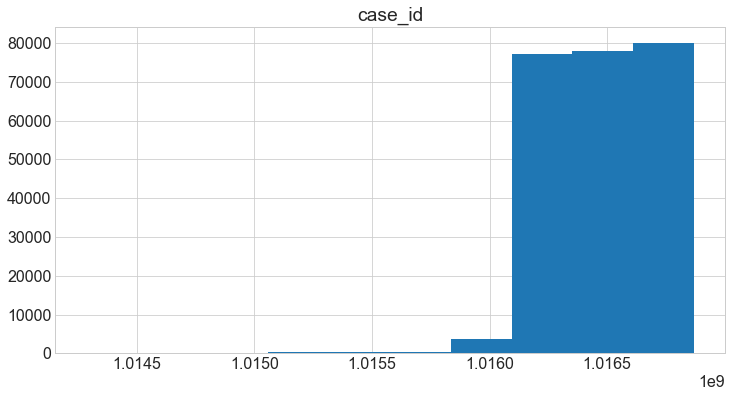

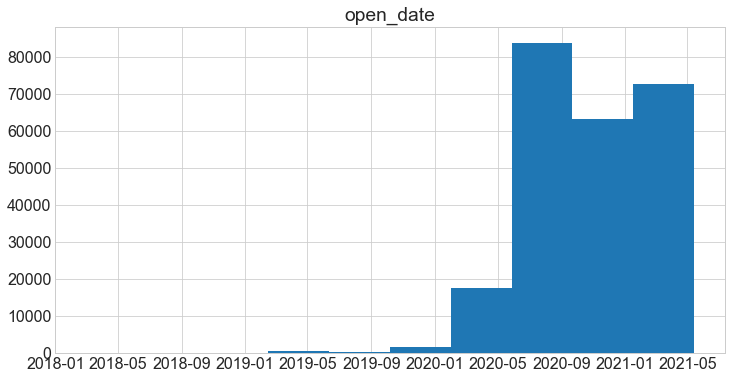

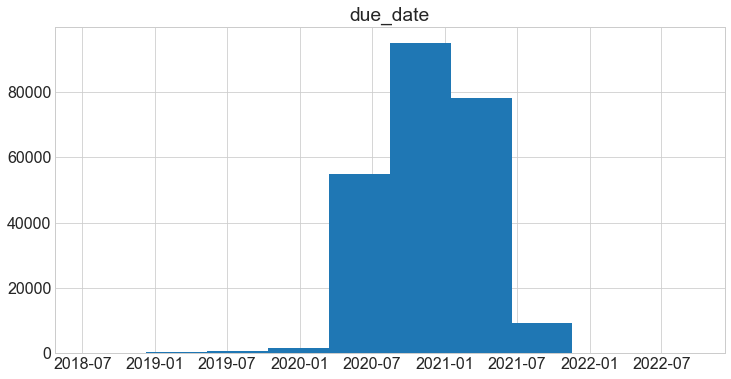

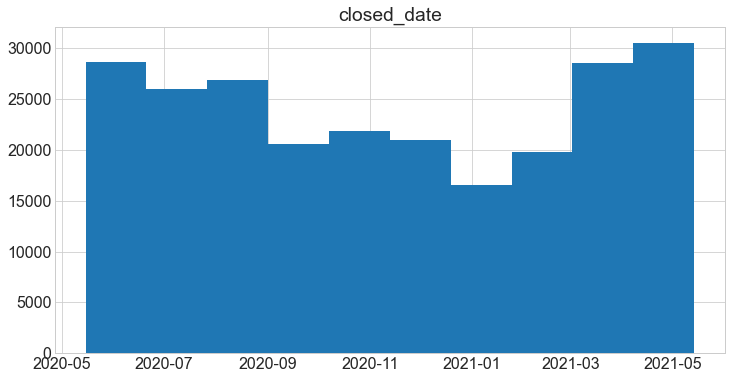

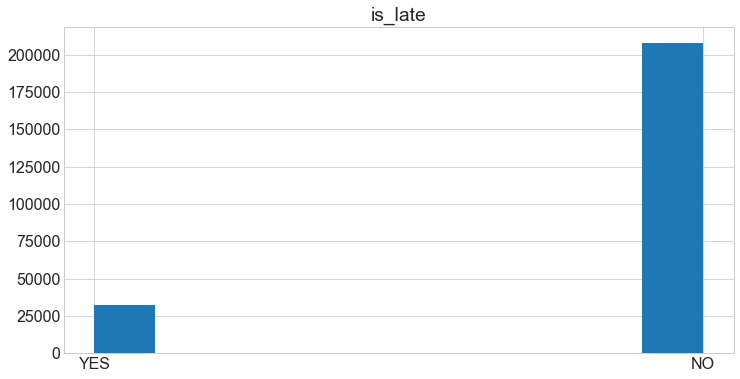

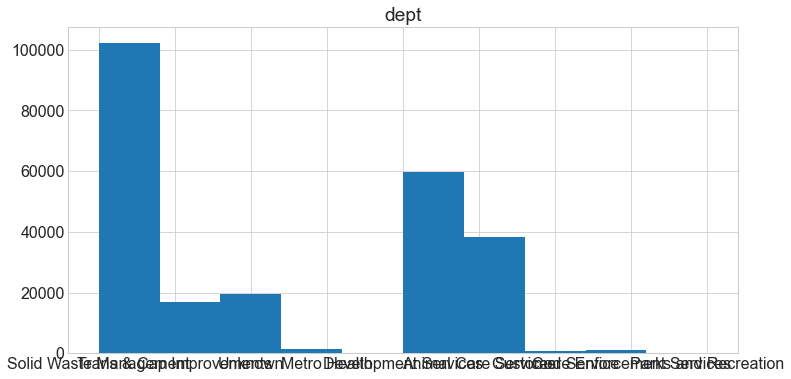

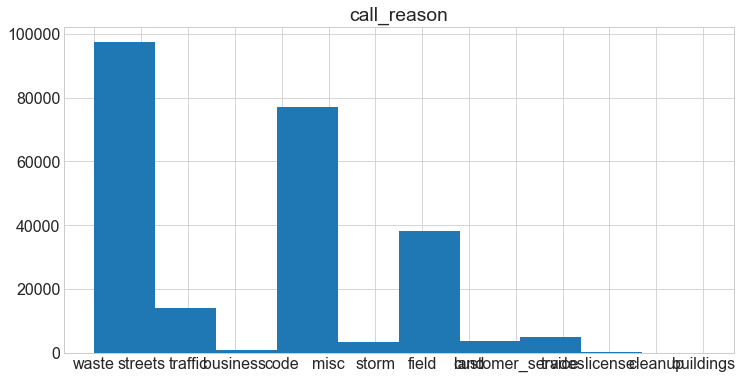

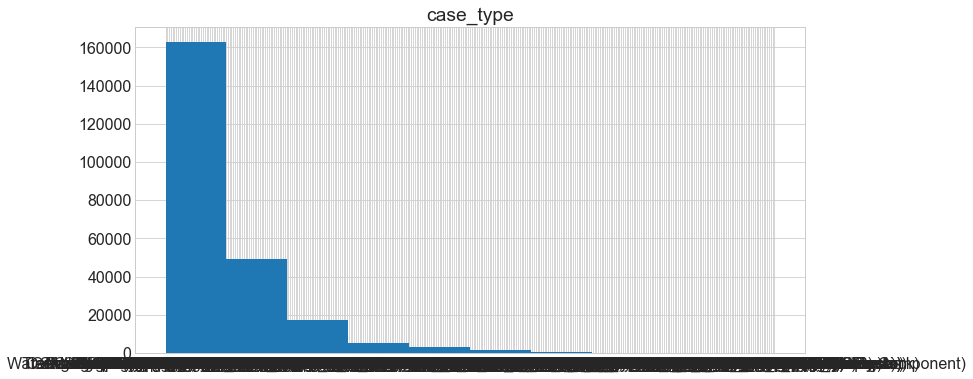

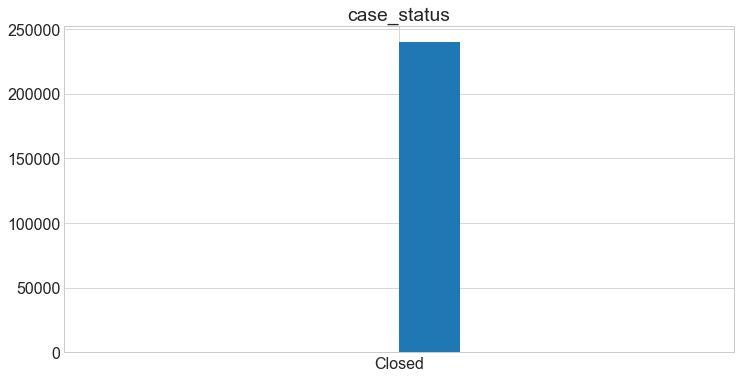

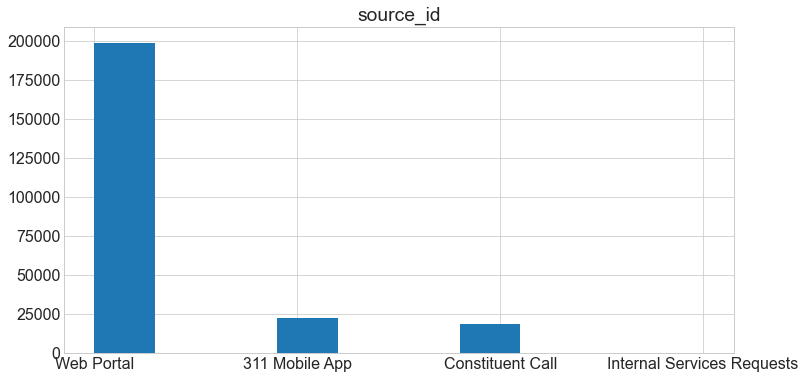

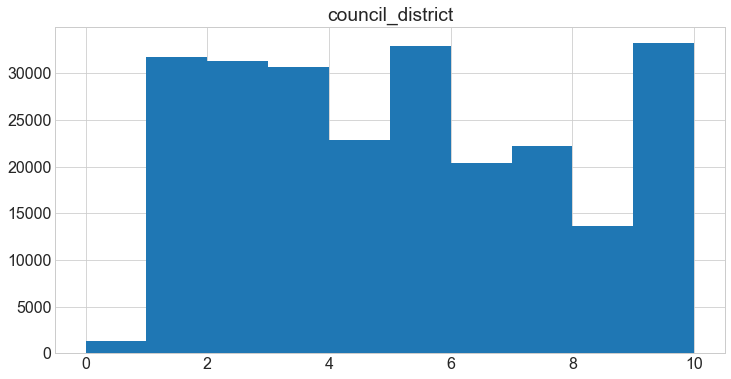

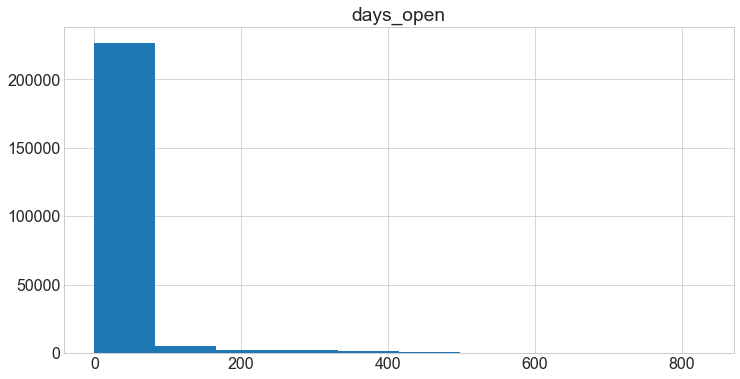

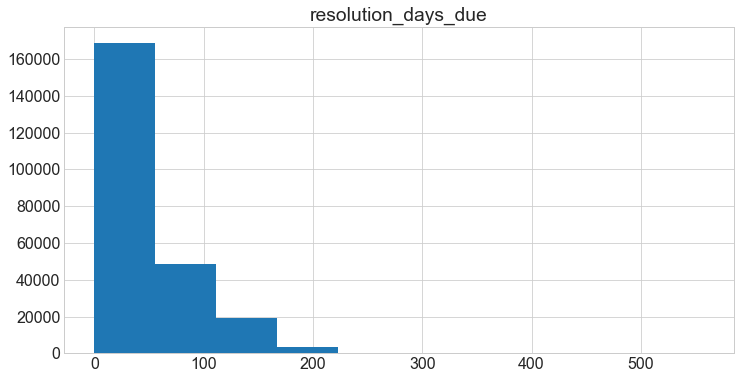

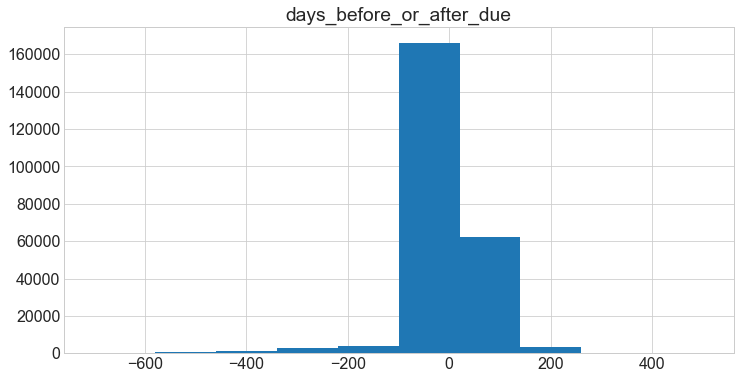

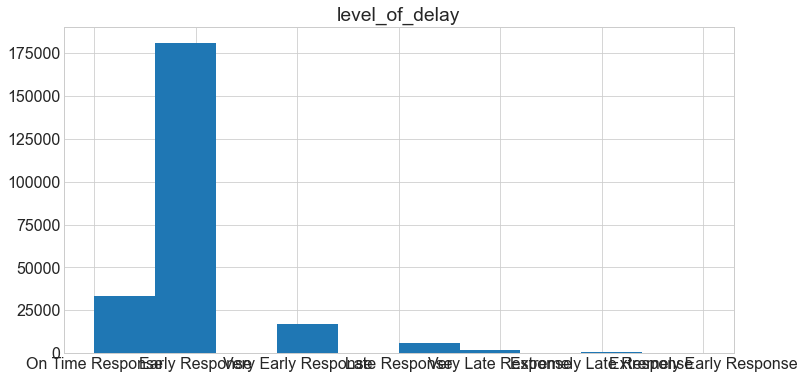

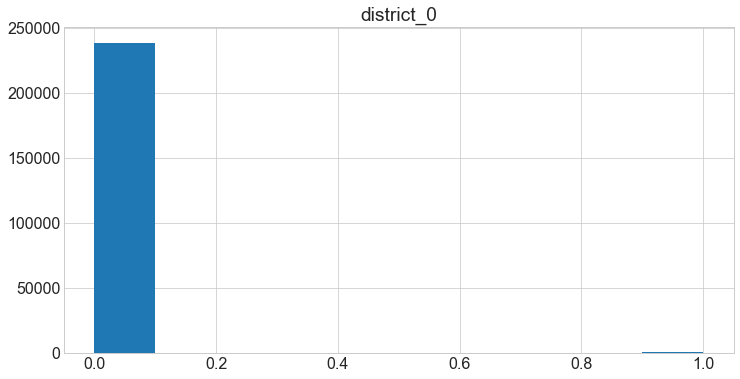

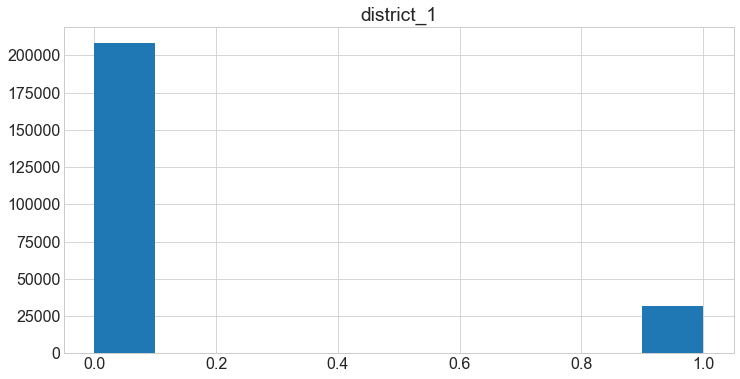

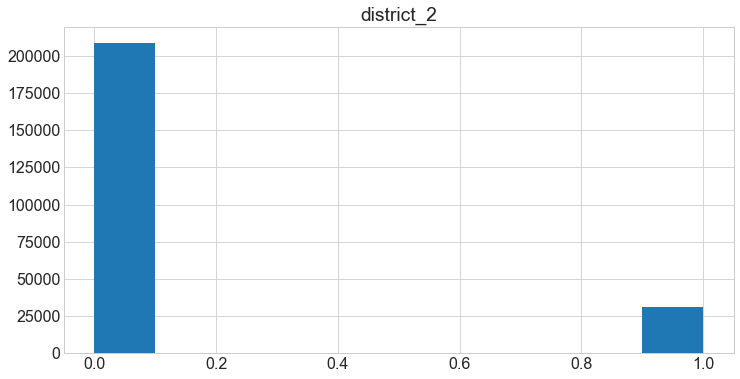

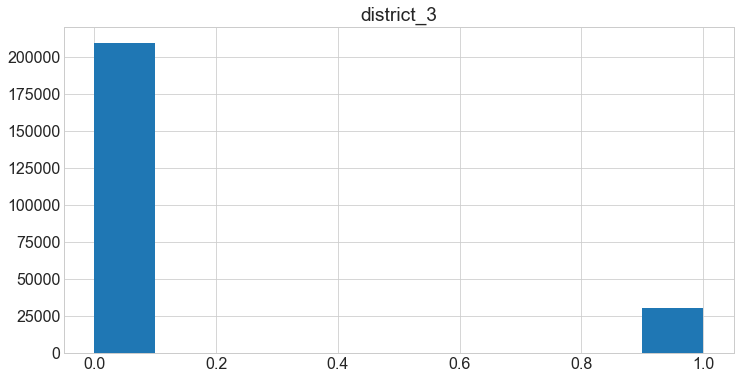

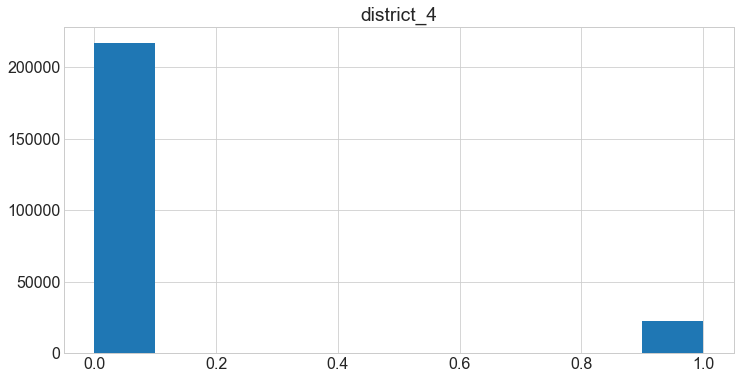

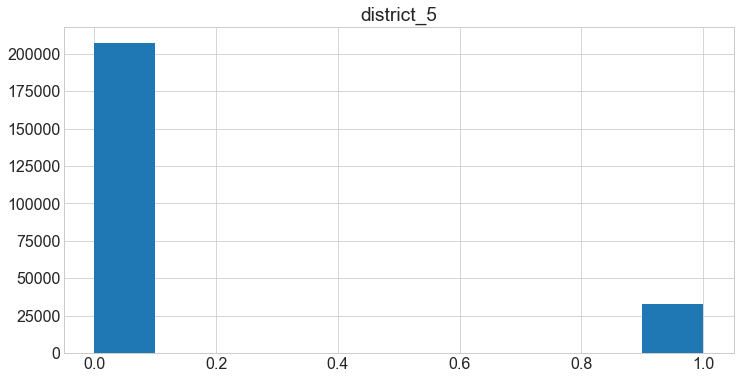

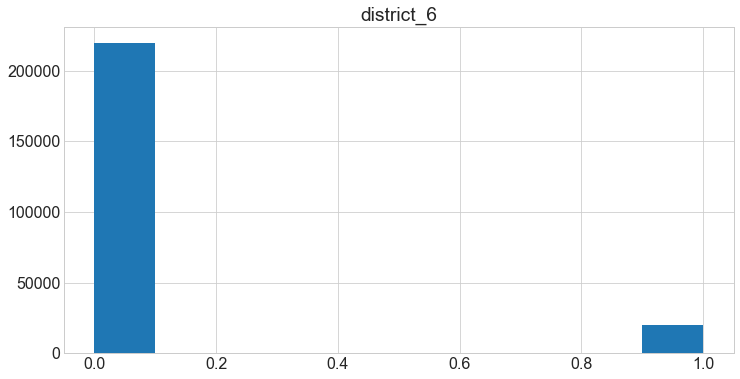

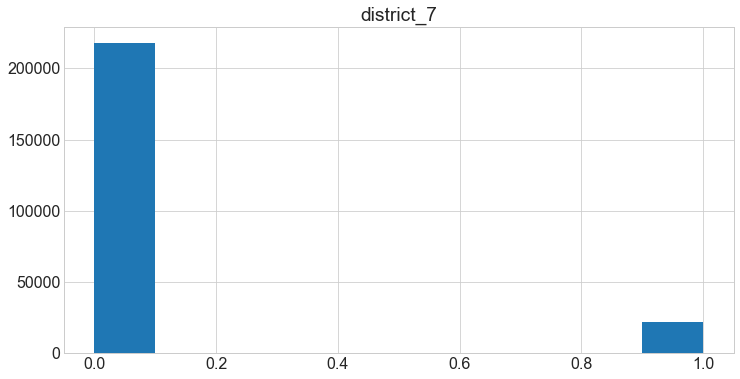

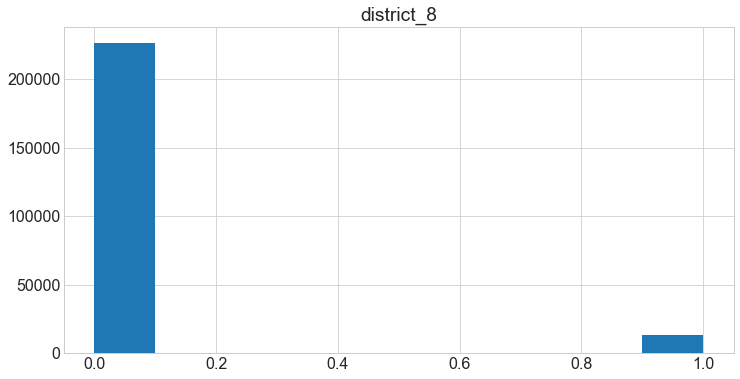

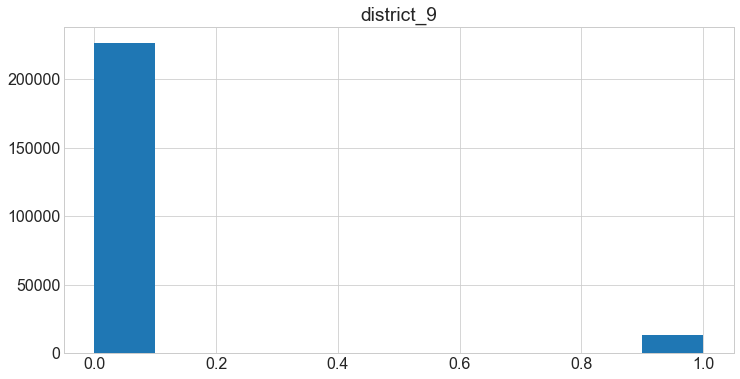

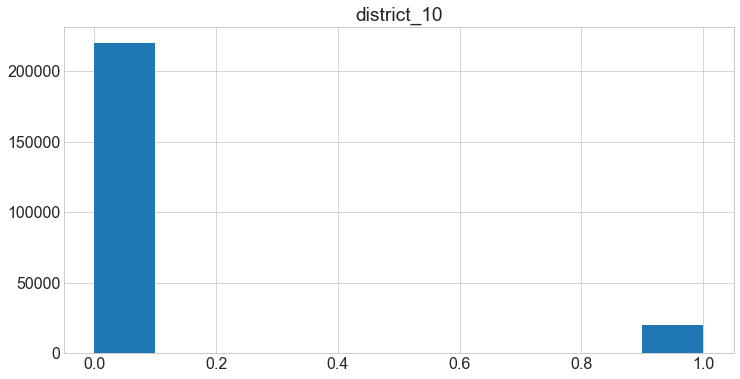

In [22]:
for col in train.drop(columns = ['address', 'longitude', 'latitude', 'zipcode']).columns:
    plt.figure(figsize=(12,6))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Takeaways

- Most cases are closed on time

- most cases were created with the web portal

- most cases are from this last year

- most responses are due on time and early even

## Q1: Is there a difference in response time between districts?

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240167 entries, 413287 to 192063
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   240167 non-null  int64         
 1   open_date                 240167 non-null  datetime64[ns]
 2   due_date                  240167 non-null  datetime64[ns]
 3   closed_date               240167 non-null  datetime64[ns]
 4   is_late                   240167 non-null  object        
 5   dept                      240167 non-null  object        
 6   call_reason               240167 non-null  object        
 7   case_type                 240167 non-null  object        
 8   case_status               240167 non-null  object        
 9   source_id                 240167 non-null  object        
 10  address                   240167 non-null  object        
 11  council_district          240167 non-null  int64         
 1

In [24]:
train.council_district.value_counts()

5     32880
1     31705
2     31344
3     30671
4     22864
7     22220
6     20337
10    19883
8     13585
9     13378
0      1300
Name: council_district, dtype: int64

In [25]:
train.days_open.mean()

19.1984952137471

In [26]:
train.groupby('council_district').days_open.mean().sort_values()

council_district
9                   13.29
8                   14.53
10                  16.14
7                   17.03
1                   17.19
4                   17.85
6                   18.31
5                   18.39
3                   21.70
2                   28.10
0                   46.04
Name: days_open, dtype: float64

In [27]:
train.groupby('council_district').days_open.median().sort_values()

council_district
0                    0.00
1                    1.00
4                    1.00
5                    1.00
2                    2.00
3                    2.00
6                    2.00
7                    2.00
8                    2.00
9                    2.00
10                   2.00
Name: days_open, dtype: float64

<AxesSubplot:xlabel='level_of_delay', ylabel='Count'>

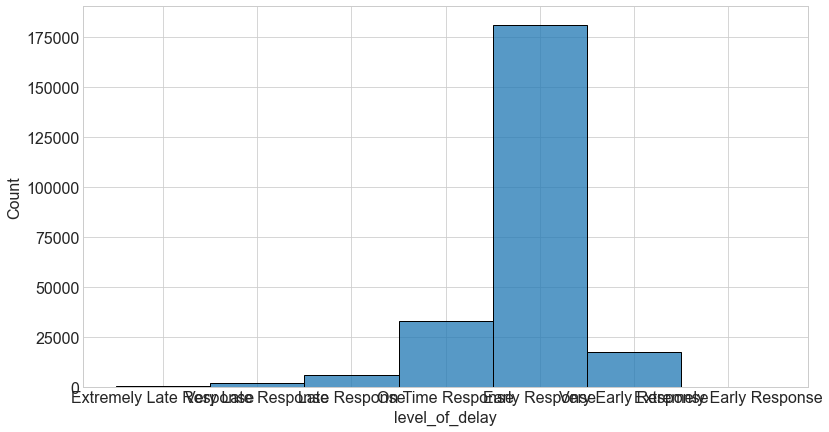

In [28]:
sns.histplot(data = train, x = 'level_of_delay')

In [29]:
train.groupby('council_district').days_before_or_after_due.mean().sort_values()

council_district
2                    6.51
4                    9.19
6                   10.77
3                   11.17
9                   11.92
10                  12.92
7                   14.45
0                   14.62
8                   15.31
5                   15.91
1                   19.87
Name: days_before_or_after_due, dtype: float64

In [30]:
train.groupby('council_district').days_before_or_after_due.median().sort_values()

council_district
2                    4.00
3                    4.00
4                    4.00
9                    4.00
1                    5.00
5                    5.00
6                    5.00
7                    5.00
8                    5.00
10                   5.00
0                   10.00
Name: days_before_or_after_due, dtype: float64

In [31]:
train.groupby('council_district').days_before_or_after_due.min().sort_values()

council_district
5                 -699.00
6                 -698.00
3                 -688.00
4                 -688.00
1                 -687.00
2                 -687.00
9                 -687.00
7                 -684.00
10                -683.00
8                 -682.00
0                 -665.00
Name: days_before_or_after_due, dtype: float64

In [32]:
train.groupby('council_district').days_before_or_after_due.max().sort_values()

council_district
0                  172.00
4                  480.00
9                  488.00
7                  494.00
6                  496.00
1                  497.00
8                  497.00
2                  498.00
3                  498.00
5                  499.00
10                 500.00
Name: days_before_or_after_due, dtype: float64

In [33]:
train.groupby('council_district').level_of_delay.value_counts()

council_district  level_of_delay          
0                 Early Response                686
                  Very Early Response           322
                  On Time Response              134
                  Late Response                 129
                  Very Late Response             25
                  Extremely Late Response         4
1                 Early Response              24078
                  On Time Response             3825
                  Very Early Response          2838
                  Late Response                 628
                  Very Late Response            247
                  Extremely Late Response        83
                  Extremely Early Response        6
2                 Early Response              22261
                  On Time Response             5169
                  Very Early Response          2149
                  Late Response                1229
                  Very Late Response            443
                  Ext

### Takeaways

- Districts 5, 1, 2, and 3 have the highest volume of cases respectively

- District 0 has the longest avg response time, as well as the least amount of cases 

- District 9 has the shortest avg response time 

- District 2 is the best at meeting their deadlines while District 1 is the worst 

- There are instances of cases being given years to resolve issues and some cases taking years to resolve

- Across all districts, most cases are resolved early

- medians of all values were lower than mean, which likely means there are outliers skewing the data

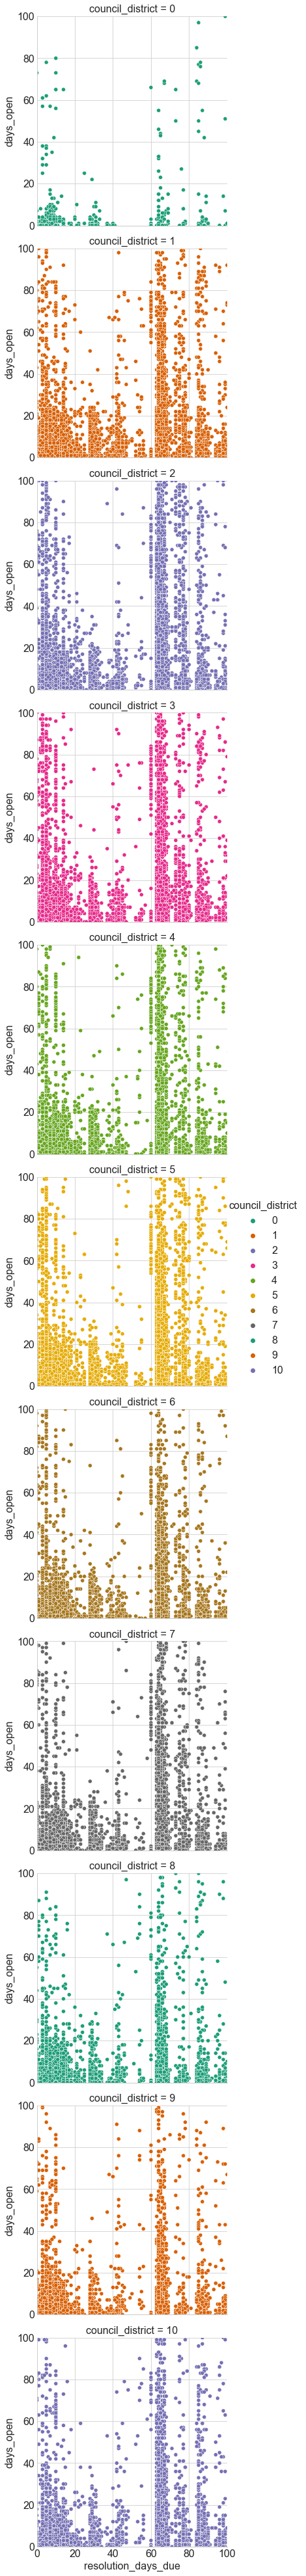

In [34]:
plot = sns.relplot(data = train, x = 'resolution_days_due', y = 'days_open', hue = 'council_district', row = 'council_district', palette= 'Dark2')

plot.set(ylim=(0, 100))

plot.set(xlim=(0, 100))


### Takeaways

- There is no strong linear correlation between due date and how long a case stays open among any district

- There is a straight vertical line around the 60 day mark for days due, perhaps that is a default setting?

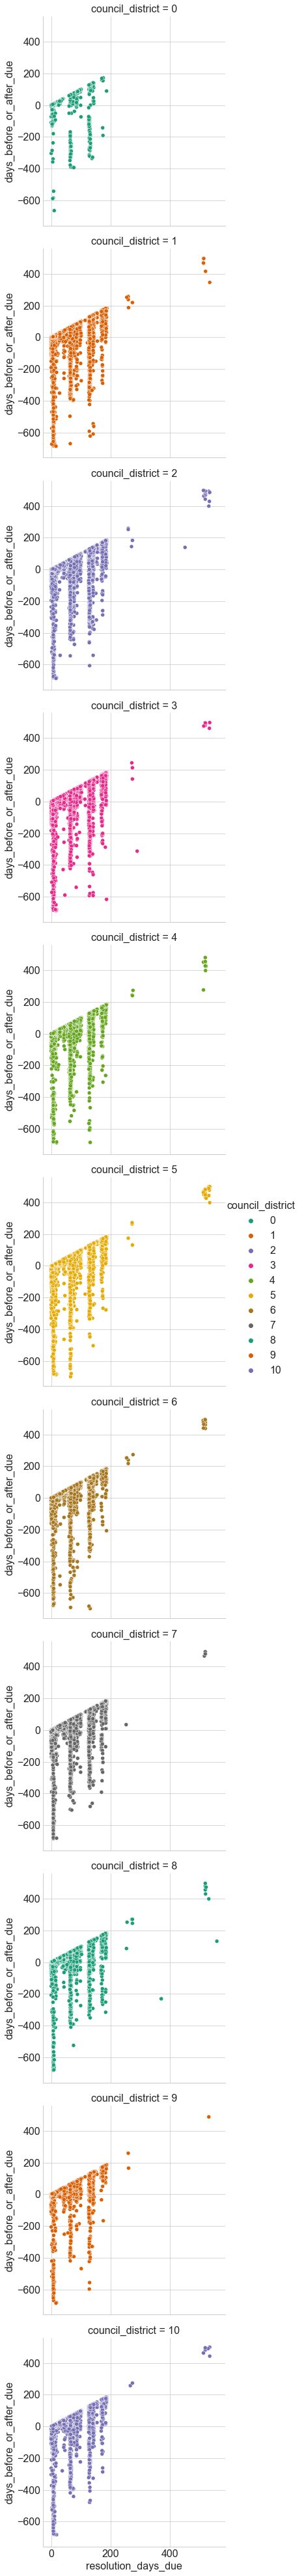

In [35]:
lot = sns.relplot(data = train, x = 'resolution_days_due', y = 'days_before_or_after_due', hue = 'council_district', row = 'council_district', palette= 'Dark2')



### Takeaways

- there does appear to be a linear correlation between how many days a task is given to be accomplished and how early a case can be closed before it is due

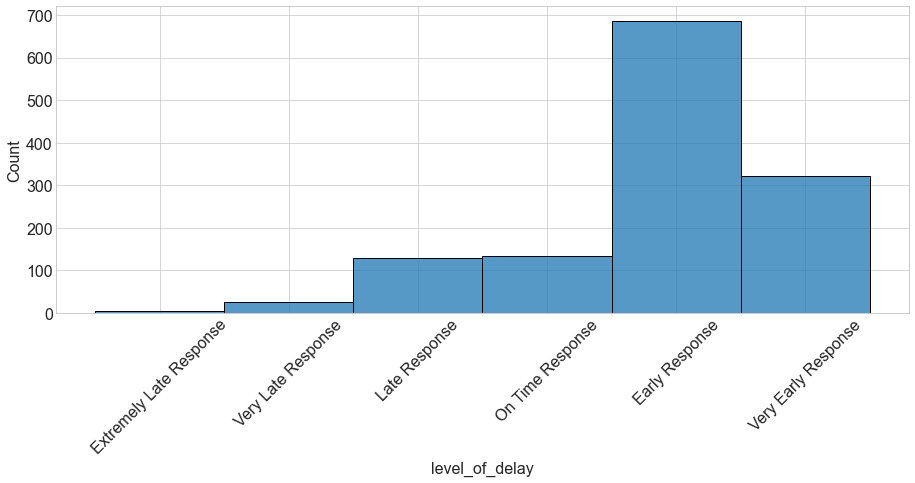

In [36]:
district0 = train[train['district_0'] == 1]

sns.histplot(data = district0, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

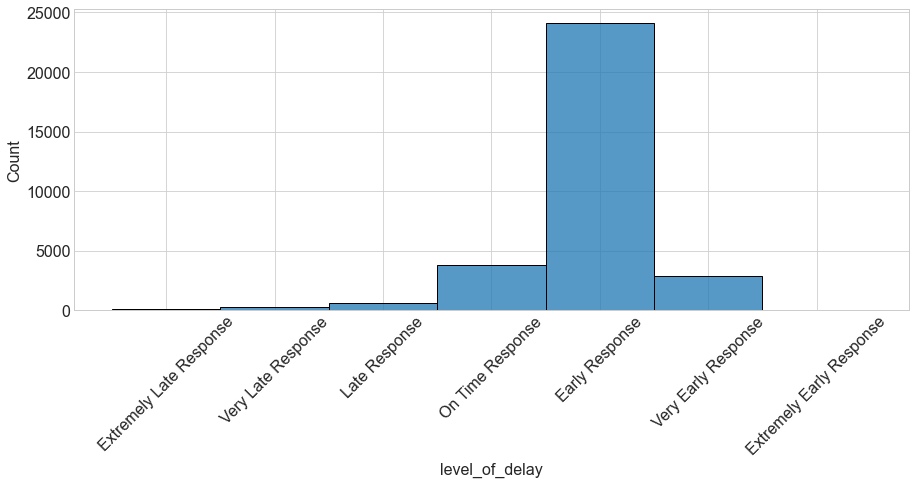

In [37]:
district1 = train[train['district_1'] == 1]

sns.histplot(data = district1, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

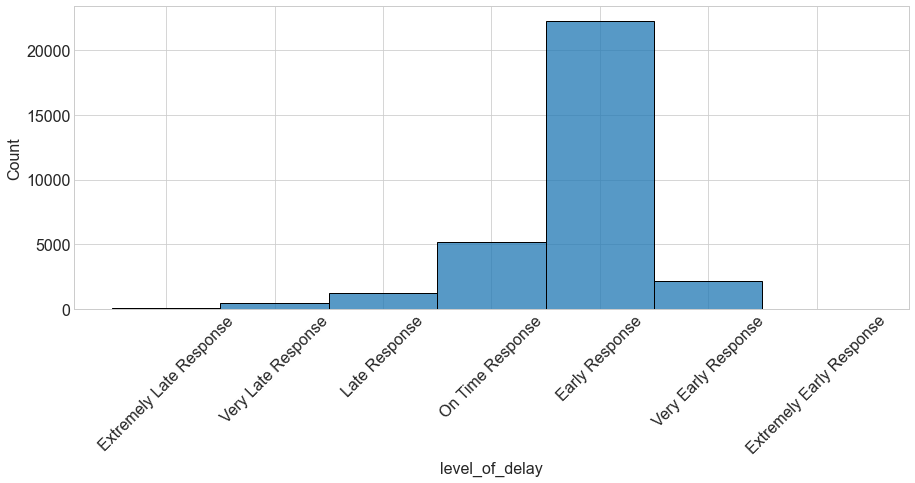

In [38]:
district2 = train[train['district_2'] == 1]

sns.histplot(data = district2, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

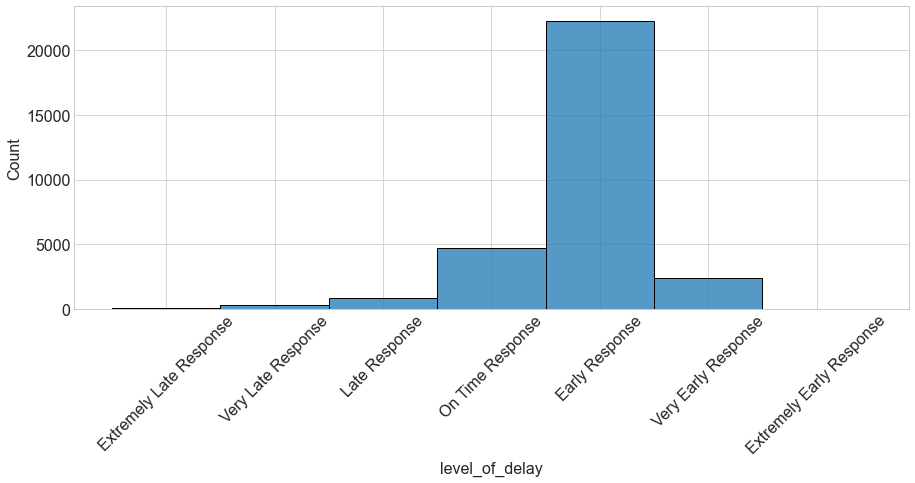

In [39]:
district3 = train[train['district_3'] == 1]

sns.histplot(data = district3, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

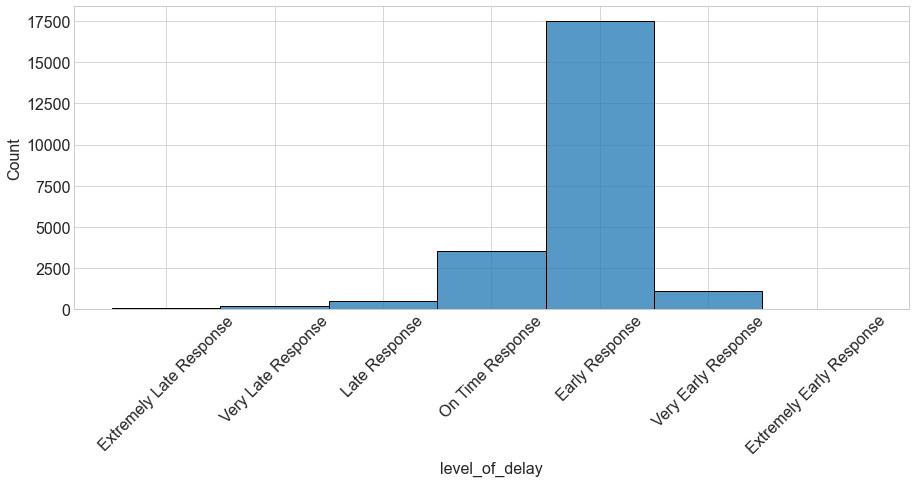

In [40]:
district4 = train[train['district_4'] == 1]

sns.histplot(data = district4, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

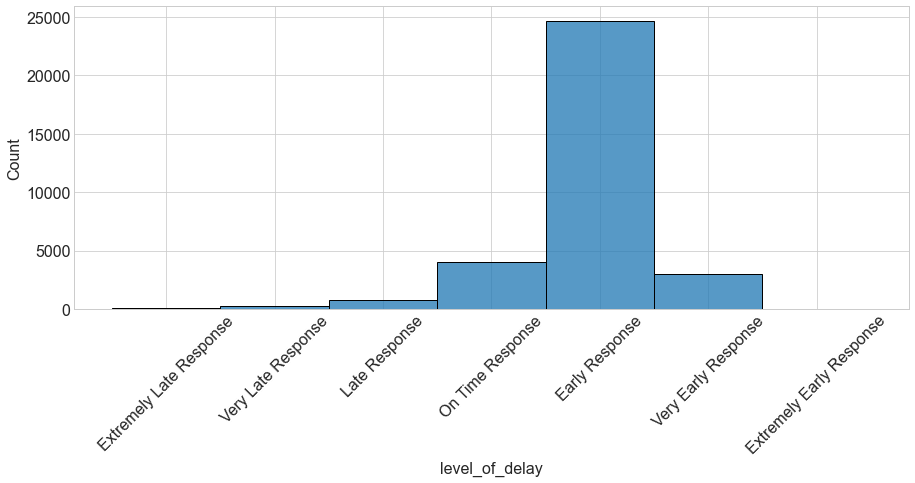

In [41]:
district5 = train[train['district_5'] == 1]

sns.histplot(data = district5, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

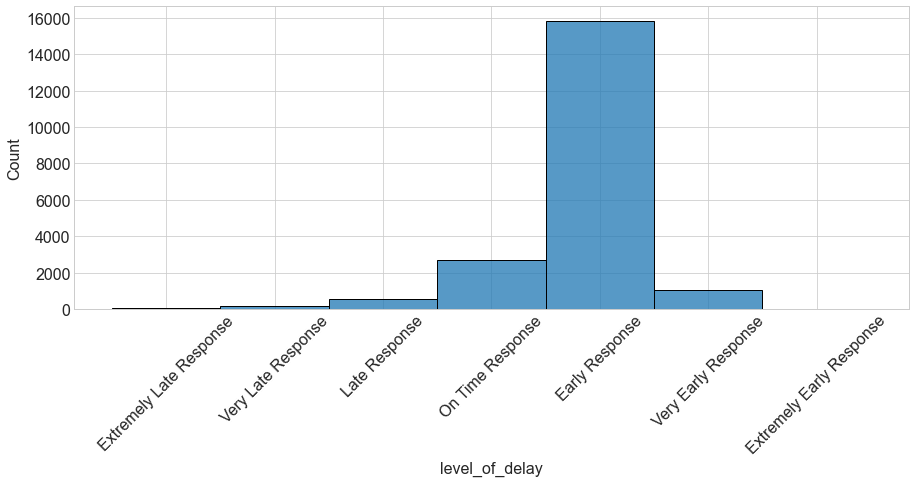

In [42]:
district6 = train[train['district_6'] == 1]

sns.histplot(data = district6, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

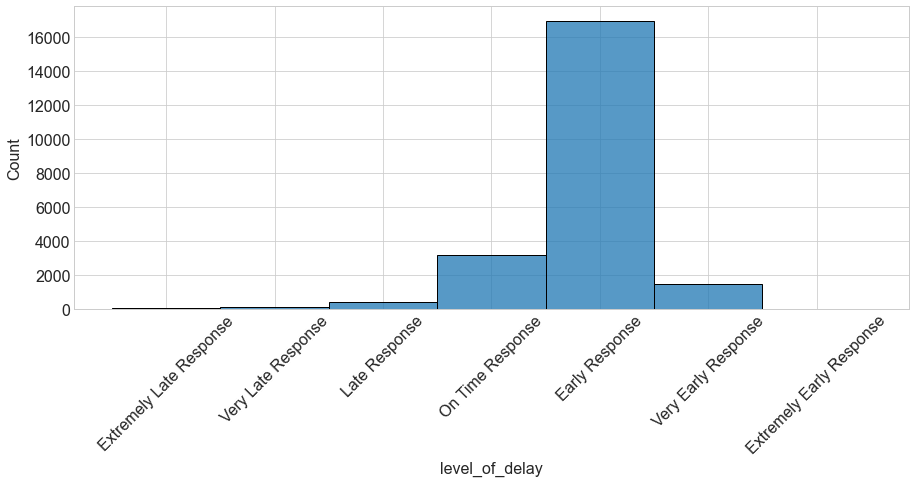

In [43]:
district7 = train[train['district_7'] == 1]

sns.histplot(data = district7, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

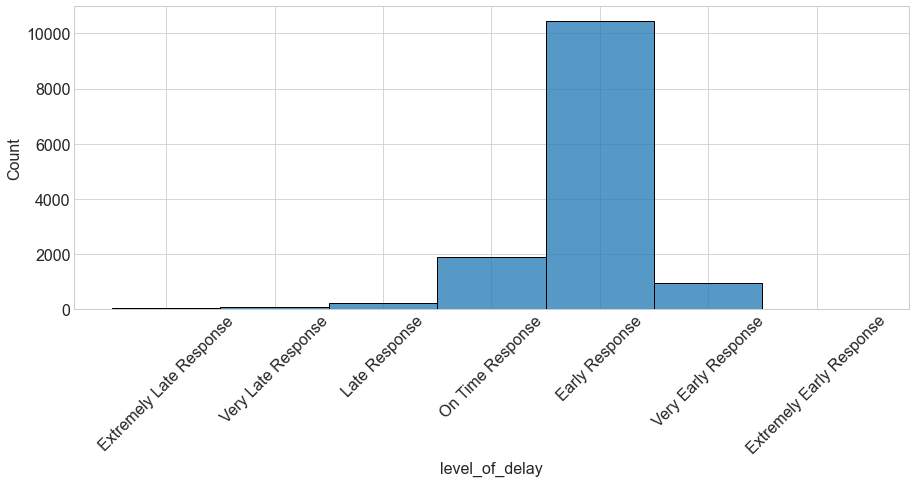

In [44]:
district8 = train[train['district_8'] == 1]

sns.histplot(data = district8, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

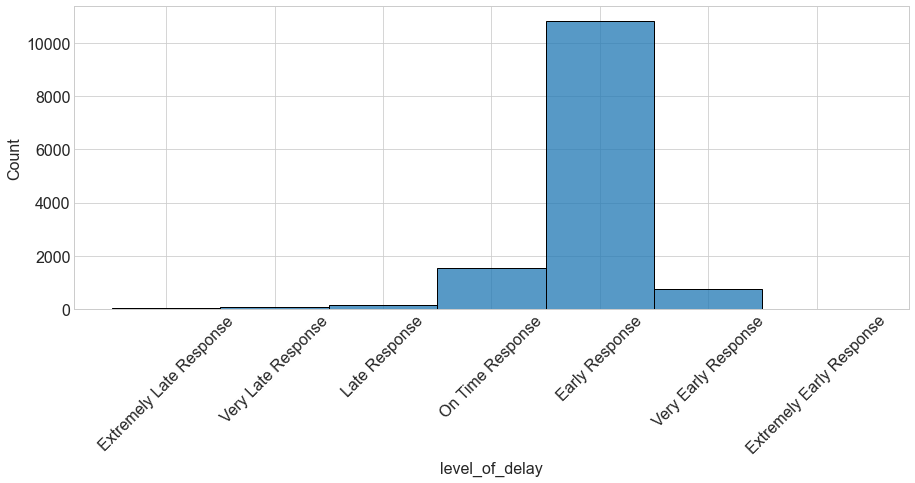

In [45]:
district9 = train[train['district_9'] == 1]

sns.histplot(data = district9, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

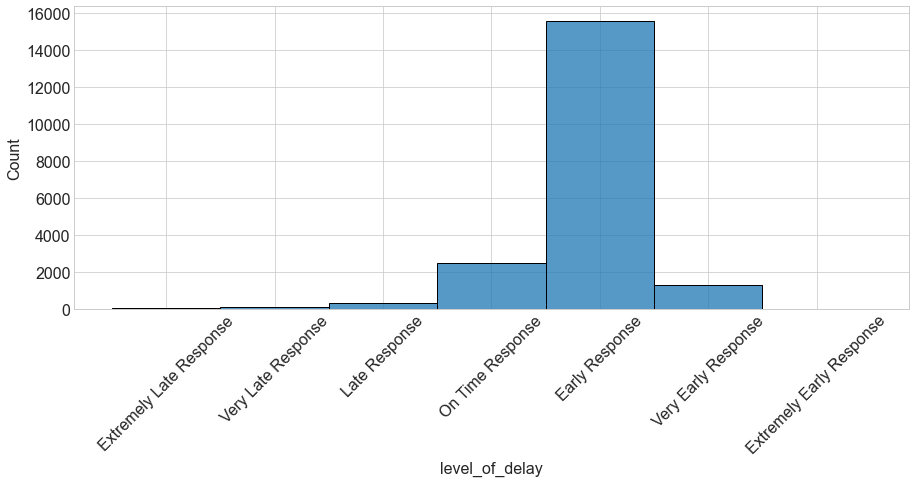

In [46]:
district10 = train[train['district_10'] == 1]

sns.histplot(data = district10, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Takeaways

- Across all districts response is classified as early

- there does not seem to be any difference in district of the city and how early the response is

### Statistical Tests

In [70]:
from math import sqrt

In [67]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the districts.'
    F, p = stats.f_oneway( 
        train.days_open[train.council_district== 0],
        train.days_open[train.council_district== 1],
        train.days_open[train.council_district== 2],
        train.days_open[train.council_district== 3],
        train.days_open[train.council_district== 4],
        train.days_open[train.council_district== 5],
        train.days_open[train.council_district== 6], 
        train.days_open[train.council_district== 7], 
        train.days_open[train.council_district== 8], 
        train.days_open[train.council_district== 9],
        train.days_open[train.council_district== 10]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [68]:
get_anova_test(train)

We reject the null hypothesis that there is no difference in days a case is open between the districts.


In [71]:
H0 = 'there is no difference in days a case is open between district 0 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 0 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district0.days_open.mean()
s = district0.days_open.std()
n = district0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

8.70192394052715
9.711103001552365e-18
there is a significant difference between the days a case is open between district 0 and the general population


In [72]:
H0 = 'there is no difference in days a case is open between district 1 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 1 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district1.days_open.mean()
s = district1.days_open.std()
n = district1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-5.626493595271632
1.9999999814540856
there is no difference in days a case is open between district 1 and the rest of the population


In [73]:
H0 = 'there is no difference in days a case is open between district 2 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 2 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district2.days_open.mean()
s = district2.days_open.std()
n = district2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

19.330359175247292
9.059959482116726e-83
there is a significant difference between the days a case is open between district 2 and the general population


In [74]:
H0 = 'there is no difference in days a case is open between district 3 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 3 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district3.days_open.mean()
s = district3.days_open.std()
n = district3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

6.159199648567921
7.402075059397531e-10
there is a significant difference between the days a case is open between district 3 and the general population


In [75]:
H0 = 'there is no difference in days a case is open between district 4 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 4 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district4.days_open.mean()
s = district4.days_open.std()
n = district4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-3.1958086536394497
1.998603710129237
there is no difference in days a case is open between district 4 and the rest of the population


In [76]:
H0 = 'there is no difference in days a case is open between district 5 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 5 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district5.days_open.mean()
s = district5.days_open.std()
n = district5.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-2.2620240069492032
1.976297579984626
there is no difference in days a case is open between district 5 and the rest of the population


In [77]:
H0 = 'there is no difference in days a case is open between district 6 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 6 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district6.days_open.mean()
s = district6.days_open.std()
n = district6.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-1.981844047733259
1.9524898606750651
there is no difference in days a case is open between district 6 and the rest of the population


In [78]:
H0 = 'there is no difference in days a case is open between district 7 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 7 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district7.days_open.mean()
s = district7.days_open.std()
n = district7.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-5.41448723516995
1.9999999378982865
there is no difference in days a case is open between district 7 and the rest of the population


In [79]:
H0 = 'there is no difference in days a case is open between district 8 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 8 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district8.days_open.mean()
s = district8.days_open.std()
n = district8.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-9.941903411812572
2.0
there is no difference in days a case is open between district 8 and the rest of the population


In [80]:
H0 = 'there is no difference in days a case is open between district 9 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 9 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district9.days_open.mean()
s = district9.days_open.std()
n = district9.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-12.851431575205897
2.0
there is no difference in days a case is open between district 9 and the rest of the population


In [81]:
H0 = 'there is no difference in days a case is open between district 10 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 10 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district10.days_open.mean()
s = district10.days_open.std()
n = district10.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-7.162074396673954
1.9999999999991775
there is no difference in days a case is open between district 10 and the rest of the population


### Takeaways

- 0, 2, and 3 are the only district that have a significant difference in days open
    - South and Southest part of the city


- there is a significance between days open and council district

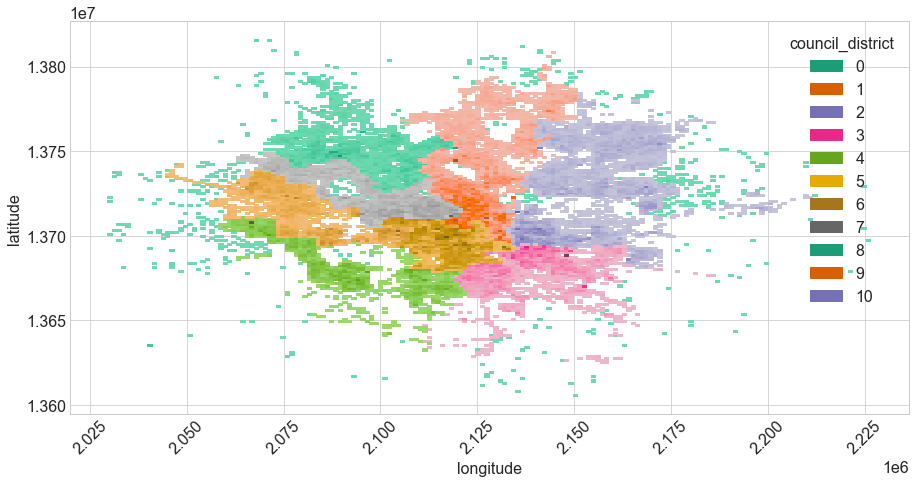

In [52]:
sns.histplot(data = train, x = 'longitude', y ='latitude', hue = 'council_district', palette= 'Dark2')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Q2: What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240167 entries, 413287 to 192063
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   240167 non-null  int64         
 1   open_date                 240167 non-null  datetime64[ns]
 2   due_date                  240167 non-null  datetime64[ns]
 3   closed_date               240167 non-null  datetime64[ns]
 4   is_late                   240167 non-null  object        
 5   dept                      240167 non-null  object        
 6   call_reason               240167 non-null  object        
 7   case_type                 240167 non-null  object        
 8   case_status               240167 non-null  object        
 9   source_id                 240167 non-null  object        
 10  address                   240167 non-null  object        
 11  council_district          240167 non-null  int64         
 1

In [58]:
train['month'] = train.open_date.dt.month

In [59]:
train.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode,date,month
413287,1016756563,2021-03-22,2021-03-25,2021-03-25,YES,Solid Waste Management,waste,No Pickup,Closed,Web Portal,"2430 LAKE LOUISE, SAN ANTONIO, 78228",7,"2,098,452.00","13,715,006.00",3.00,3,0.00,On Time Response,0,0,0,0,0,0,0,1,0,0,0,78228,3,3
454053,1016816279,2021-04-19,2021-04-21,2021-04-19,NO,Trans & Cap Improvements,streets,Pavement Repair (Pothole),Closed,Web Portal,FAITH DR and LURA LN,7,"2,100,261.00","13,718,518.00",0.00,2,2.00,Early Response,0,0,0,0,0,0,0,1,0,0,0,NaN,4,4
412793,1016755838,2021-03-22,2021-03-29,2021-03-31,YES,Solid Waste Management,waste,Carts(Removed from Service),Closed,Web Portal,"734 DONALDSON AVE, SAN ANTONIO, 78201",7,"2,115,439.00","13,716,364.00",9.00,7,-2.00,On Time Response,0,0,0,0,0,0,0,1,0,0,0,78201,3,3
51664,1016211764,2020-05-26,2020-05-27,2020-05-26,NO,Unknown,traffic,Traffic Signals (Maintenance_Emergency),Closed,Web Portal,PEREIDA ST and S ST MARYS ST,1,"2,131,315.00","13,698,007.00",0.00,1,1.00,Early Response,0,1,0,0,0,0,0,0,0,0,0,NaN,5,5
383234,1016708721,2021-02-26,2021-03-05,2021-03-01,NO,Solid Waste Management,waste,Carts(Damaged Cart),Closed,Web Portal,"6707 HARMONY FARM, SAN ANTONIO, 78249",8,"2,089,165.00","13,750,628.00",3.00,7,4.00,Early Response,0,0,0,0,0,0,0,0,1,0,0,78249,2,2


In [60]:
time_train = train.set_index('open_date').sort_index()

In [ ]:
time_train = time_train[time_train['']]

In [61]:
time_train.head()

,case_id,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode,date,month
open_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-28,1014281677,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,"2,067,118.00","13,723,868.00",829.00,131,-698.00,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78251,2,2
2018-04-12,1014417484,2018-08-21,2020-07-07,YES,Code Enforcement Services,code,Minimum Housing-Tenant Occupied,Closed,Internal Services Requests,"2434 LOOP 410 SW, San Antonio, 78227",4,"2,080,406.00","13,695,620.00",817.00,131,-686.00,Extremely Late Response,0,0,0,0,1,0,0,0,0,0,0,78227,4,4
2018-04-12,1014417218,2018-08-21,2020-07-07,YES,Code Enforcement Services,code,Minimum Housing-Tenant Occupied,Closed,Internal Services Requests,"2434 LOOP 410 SW, San Antonio, 78227",4,"2,080,406.00","13,695,620.00",817.00,131,-686.00,Extremely Late Response,0,0,0,0,1,0,0,0,0,0,0,78227,4,4
2018-05-17,1014521168,2018-09-25,2020-06-09,YES,Code Enforcement Services,buildings,DSDB Ordered/Hold Harmless/Regular: ASEC,Closed,Internal Services Requests,"938 WAVERLY, San Antonio, 78201",1,"2,119,249.00","13,710,455.00",754.00,131,-623.00,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0,78201,5,5
2018-07-18,1014700854,2018-11-22,2020-10-05,YES,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"6206 HEATH RD, San Antonio, 78250",6,"2,082,546.00","13,726,218.00",810.00,127,-683.00,Extremely Late Response,0,0,0,0,0,0,1,0,0,0,0,78250,7,7


In [62]:
time_train.index.min(), time_train.index.max()

(Timestamp('2018-02-28 00:00:00'), Timestamp('2021-05-14 00:00:00'))

In [83]:
time_train.days_open.resample('M').mean().sort_values()

open_date
2021-05-31                   1.87
2021-04-30                   3.85
2021-03-31                   4.73
2021-01-31                   6.08
2021-02-28                   6.28
2020-11-30                   7.84
2020-12-31                   8.00
2020-10-31                   8.60
2020-07-31                  14.42
2020-06-30                  15.03
2020-09-30                  16.87
2020-08-31                  17.07
2020-05-31                  19.84
2020-04-30                 123.49
2020-03-31                 188.63
2020-02-29                 234.72
2019-12-31                 305.59
2019-11-30                 329.32
2020-01-31                 357.56
2019-10-31                 387.13
2019-09-30                 419.09
2019-08-31                 444.65
2019-07-31                 468.49
2019-06-30                 503.36
2019-05-31                 508.36
2019-04-30                 561.97
2019-03-31                 579.56
2019-02-28                 638.80
2018-11-30                 645.00
2019

<AxesSubplot:xlabel='open_date'>

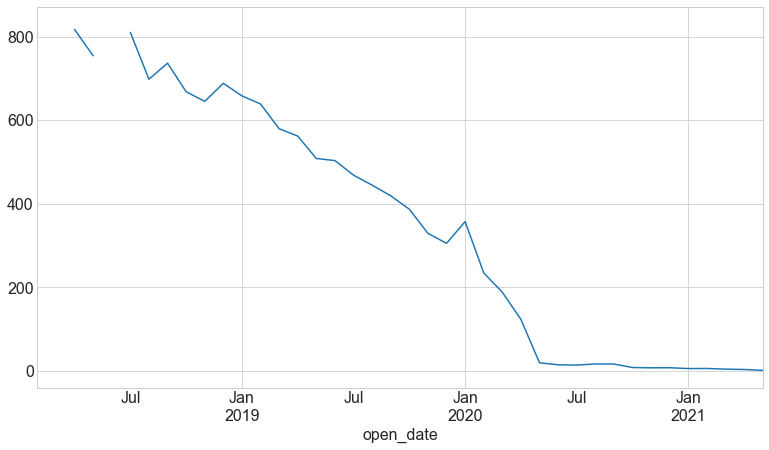

In [84]:
time_train.days_open.resample('M').mean().plot()